In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv("insurance.csv")
data.head()
data.shape

(1338, 7)

In [3]:
data.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()


,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
data.isnull().sum()/len(data)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
expenses    0.0
dtype: float64

In [7]:
data["bmi"].isnull().sum()

0

In [8]:
data.bmi.fillna(data.bmi.mean(),inplace=True)

In [9]:
data.isnull().sum()/len(data)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
expenses    0.0
dtype: float64

In [10]:
data.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<AxesSubplot:>

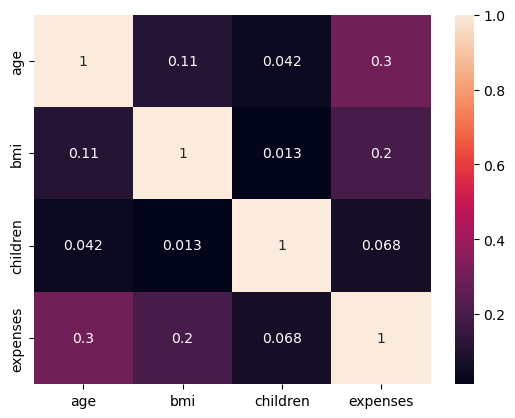

In [11]:
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='age', ylabel='expenses'>

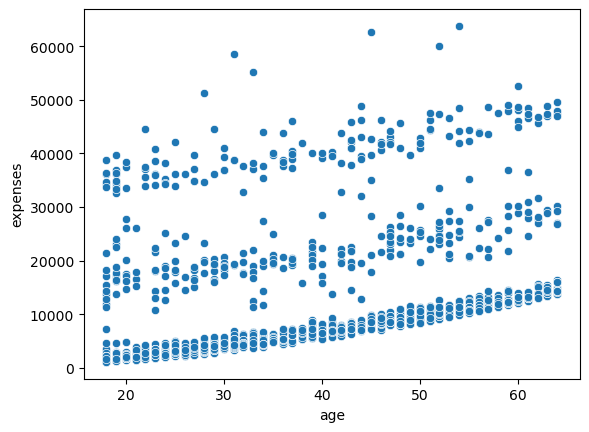

In [12]:
sns.scatterplot(x=data["age"],y=data["expenses"])

<AxesSubplot:xlabel='age', ylabel='expenses'>

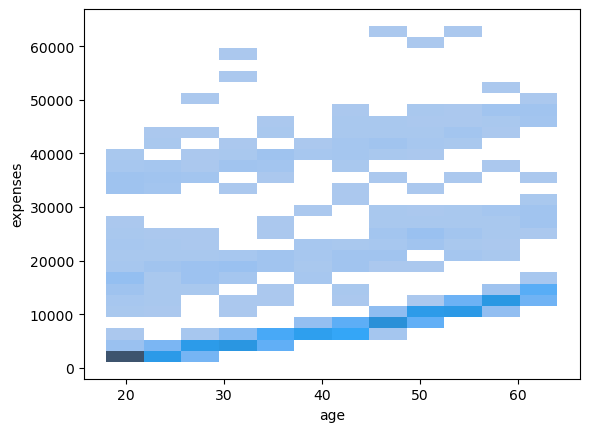

In [13]:
sns.histplot(x=data["age"],y=data["expenses"])

<AxesSubplot:xlabel='age', ylabel='Count'>

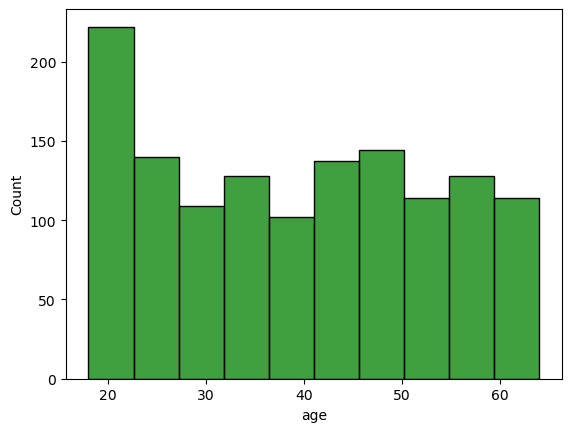

In [14]:
sns.histplot(data=data,x="age",color="green",edgecolor="black",bins=10)

<AxesSubplot:xlabel='age'>

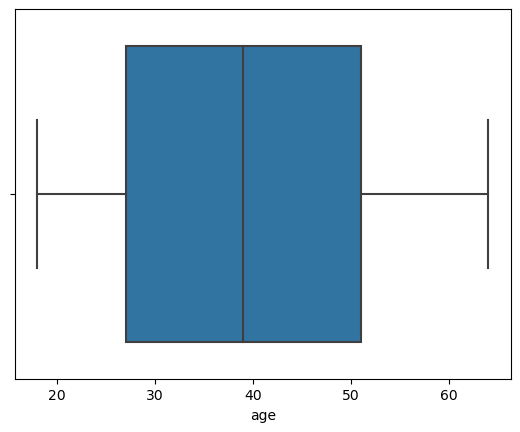

In [15]:
sns.boxplot(data=data,x="age")

In [16]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [17]:
data.sex=enc.fit_transform(data.sex)
data.sex

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int32

In [18]:
data.region=enc.fit_transform(data.region)
data.region

0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Name: region, Length: 1338, dtype: int32

In [19]:
data.smoker=enc.fit_transform(data.smoker)
data.smoker

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int32

<AxesSubplot:>

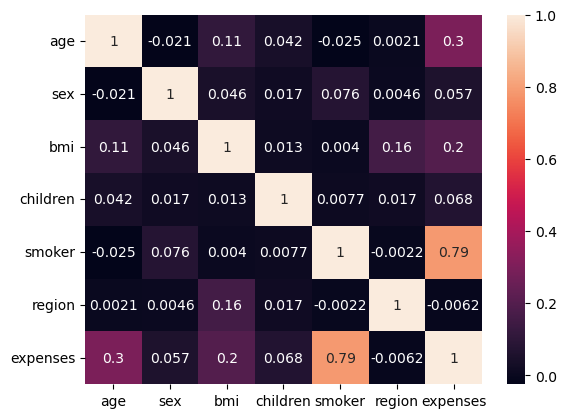

In [20]:
sns.heatmap(data.corr(),annot=True)

In [21]:
data.drop('region',axis=1,inplace=True)

In [22]:
data

,age,sex,bmi,children,smoker,expenses
0,19,0,27.9,0,1,16884.92
1,18,1,33.8,1,0,1725.55
2,28,1,33.0,3,0,4449.46
3,33,1,22.7,0,0,21984.47
4,32,1,28.9,0,0,3866.86
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,10600.55
1334,18,0,31.9,0,0,2205.98
1335,18,0,36.9,0,0,1629.83
1336,21,0,25.8,0,0,2007.95


In [23]:
x=data[['age','sex','bmi','children','smoker']]
y=data.expenses

In [24]:
data

,age,sex,bmi,children,smoker,expenses
0,19,0,27.9,0,1,16884.92
1,18,1,33.8,1,0,1725.55
2,28,1,33.0,3,0,4449.46
3,33,1,22.7,0,0,21984.47
4,32,1,28.9,0,0,3866.86
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,10600.55
1334,18,0,31.9,0,0,2205.98
1335,18,0,36.9,0,0,1629.83
1336,21,0,25.8,0,0,2007.95


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)
x_train.shape

(1070, 5)

In [28]:

from sklearn.linear_model import LinearRegression

In [29]:
model=LinearRegression()

In [30]:
model.fit(x_train,y_train)

LinearRegression()

In [31]:
model_pred=model.predict(x_test)

In [32]:
from sklearn.metrics import r2_score

In [33]:
r2_score(y_test,model_pred)

0.6931491538324288

In [34]:
from joblib import dump,load

In [35]:
dump(model,'insur.joblib')

['insur.joblib']